finding fraud

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv("insurance_claim.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# EDA

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
#1. Describe the dataset used.

df.shape

(1000, 40)

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df = df.drop_duplicates()
df.shape

(1000, 40)

In [10]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [11]:
df.drop('_c39', axis=1, inplace=True)

# Find zero values

In [12]:
#Count the zero values from Dataframe

def columns_with_zeros(df):
    zero_counts = df.eq(0).sum()
    for column_name, count in zero_counts.items():
        if count > 0:
            print(f"Column '{column_name}' has zero's : {count} ")

columns_with_zeros(df)

Column 'months_as_customer' has zero's : 1 
Column 'umbrella_limit' has zero's : 798 
Column 'capital-gains' has zero's : 508 
Column 'capital-loss' has zero's : 475 
Column 'incident_hour_of_the_day' has zero's : 52 
Column 'bodily_injuries' has zero's : 340 
Column 'witnesses' has zero's : 249 
Column 'injury_claim' has zero's : 25 
Column 'property_claim' has zero's : 19 


In [13]:
#Replace zero With Mean

columns_with_zeros = [
    'months_as_customer',
    'umbrella_limit',
    'capital-gains',
    'capital-loss',
    'incident_hour_of_the_day',
    'bodily_injuries',
    'witnesses',
    'injury_claim',
    'property_claim'
]

column_means = df[columns_with_zeros].mean()

df[columns_with_zeros] = df[columns_with_zeros].replace(0, column_means)

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328.0,48,521585,2014-10-17,OH,250/500,1000,1406.91,1101000,466132,...,2.000,YES,71610,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228.0,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,1.487,?,5070,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134.0,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3.000,NO,34650,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256.0,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2.000,NO,63400,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228.0,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1.000,NO,6500,1300.0,650.0,4550,Accura,RSX,2009,N


In [15]:
df['policy_state'].value_counts()

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

In [16]:
df['police_report_available'].value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [17]:
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

# Convert Catagorical column into numeric Coluumn i.e LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [20]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
numeric_columns = df.select_dtypes(include=np.number).columns

In [22]:
df[numeric_columns] = df[numeric_columns].replace('?', np.nan)

In [23]:
column_means = df[numeric_columns].mean()
df[numeric_columns] = df[numeric_columns].fillna(column_means)

In [24]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328.0,48,521585,940,2,1,1000,1406.91,1101000,466132,...,2.000,2,71610,6510.0,13020.0,52080,10,1,2004,1
1,228.0,42,342868,635,1,1,2000,1197.22,5000000,468176,...,1.487,0,5070,780.0,780.0,3510,8,12,2007,1
2,134.0,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3.000,1,34650,7700.0,3850.0,23100,4,30,2007,0
3,256.0,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2.000,1,63400,6340.0,6340.0,50720,3,34,2014,1
4,228.0,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1.000,1,6500,1300.0,650.0,4550,0,31,2009,0


# Replace '?' values with NaN

In [25]:
numeric_columns = df.select_dtypes(include=np.number).columns

df[numeric_columns] = df[numeric_columns].replace('?', np.nan)

column_means = df[numeric_columns].mean()

df[numeric_columns] = df[numeric_columns].fillna(column_means)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328.0,48,521585,940,2,1,1000,1406.91,1101000,466132,...,2.000,2,71610,6510.0,13020.0,52080,10,1,2004,1
1,228.0,42,342868,635,1,1,2000,1197.22,5000000,468176,...,1.487,0,5070,780.0,780.0,3510,8,12,2007,1
2,134.0,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3.000,1,34650,7700.0,3850.0,23100,4,30,2007,0
3,256.0,41,227811,19,0,1,2000,1415.74,6000000,608117,...,2.000,1,63400,6340.0,6340.0,50720,3,34,2014,1
4,228.0,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1.000,1,6500,1300.0,650.0,4550,0,31,2009,0


# Outlier Detection

Outliers in months_as_customer: No outliers found.
Outliers in age: No outliers found.
Outliers in policy_number: No outliers found.
Outliers in policy_deductable: No outliers found.
Outliers in policy_annual_premium: [2047.59, 433.33, 484.67]
Outliers in umbrella_limit: [8000000, 8000000, 9000000, 10000000, 8000000, 8000000, 8000000, 10000000, 9000000, 8000000, 9000000, 9000000, 8000000, 8000000, 9000000]
Outliers in insured_zip: No outliers found.
Outliers in capital-gains: [94800.0, 90700.0, 91900.0, 98800.0, 100500.0]
Outliers in capital-loss: [-91200.0, -91400.0, -90600.0, -93600.0, -111100.0]
Outliers in incident_hour_of_the_day: No outliers found.
Outliers in number_of_vehicles_involved: No outliers found.
Outliers in bodily_injuries: No outliers found.
Outliers in witnesses: No outliers found.
Outliers in total_claim_amount: No outliers found.
Outliers in injury_claim: No outliers found.
Outliers in property_claim: [23670.0, 21810.0]
Outliers in vehicle_claim: No outliers found

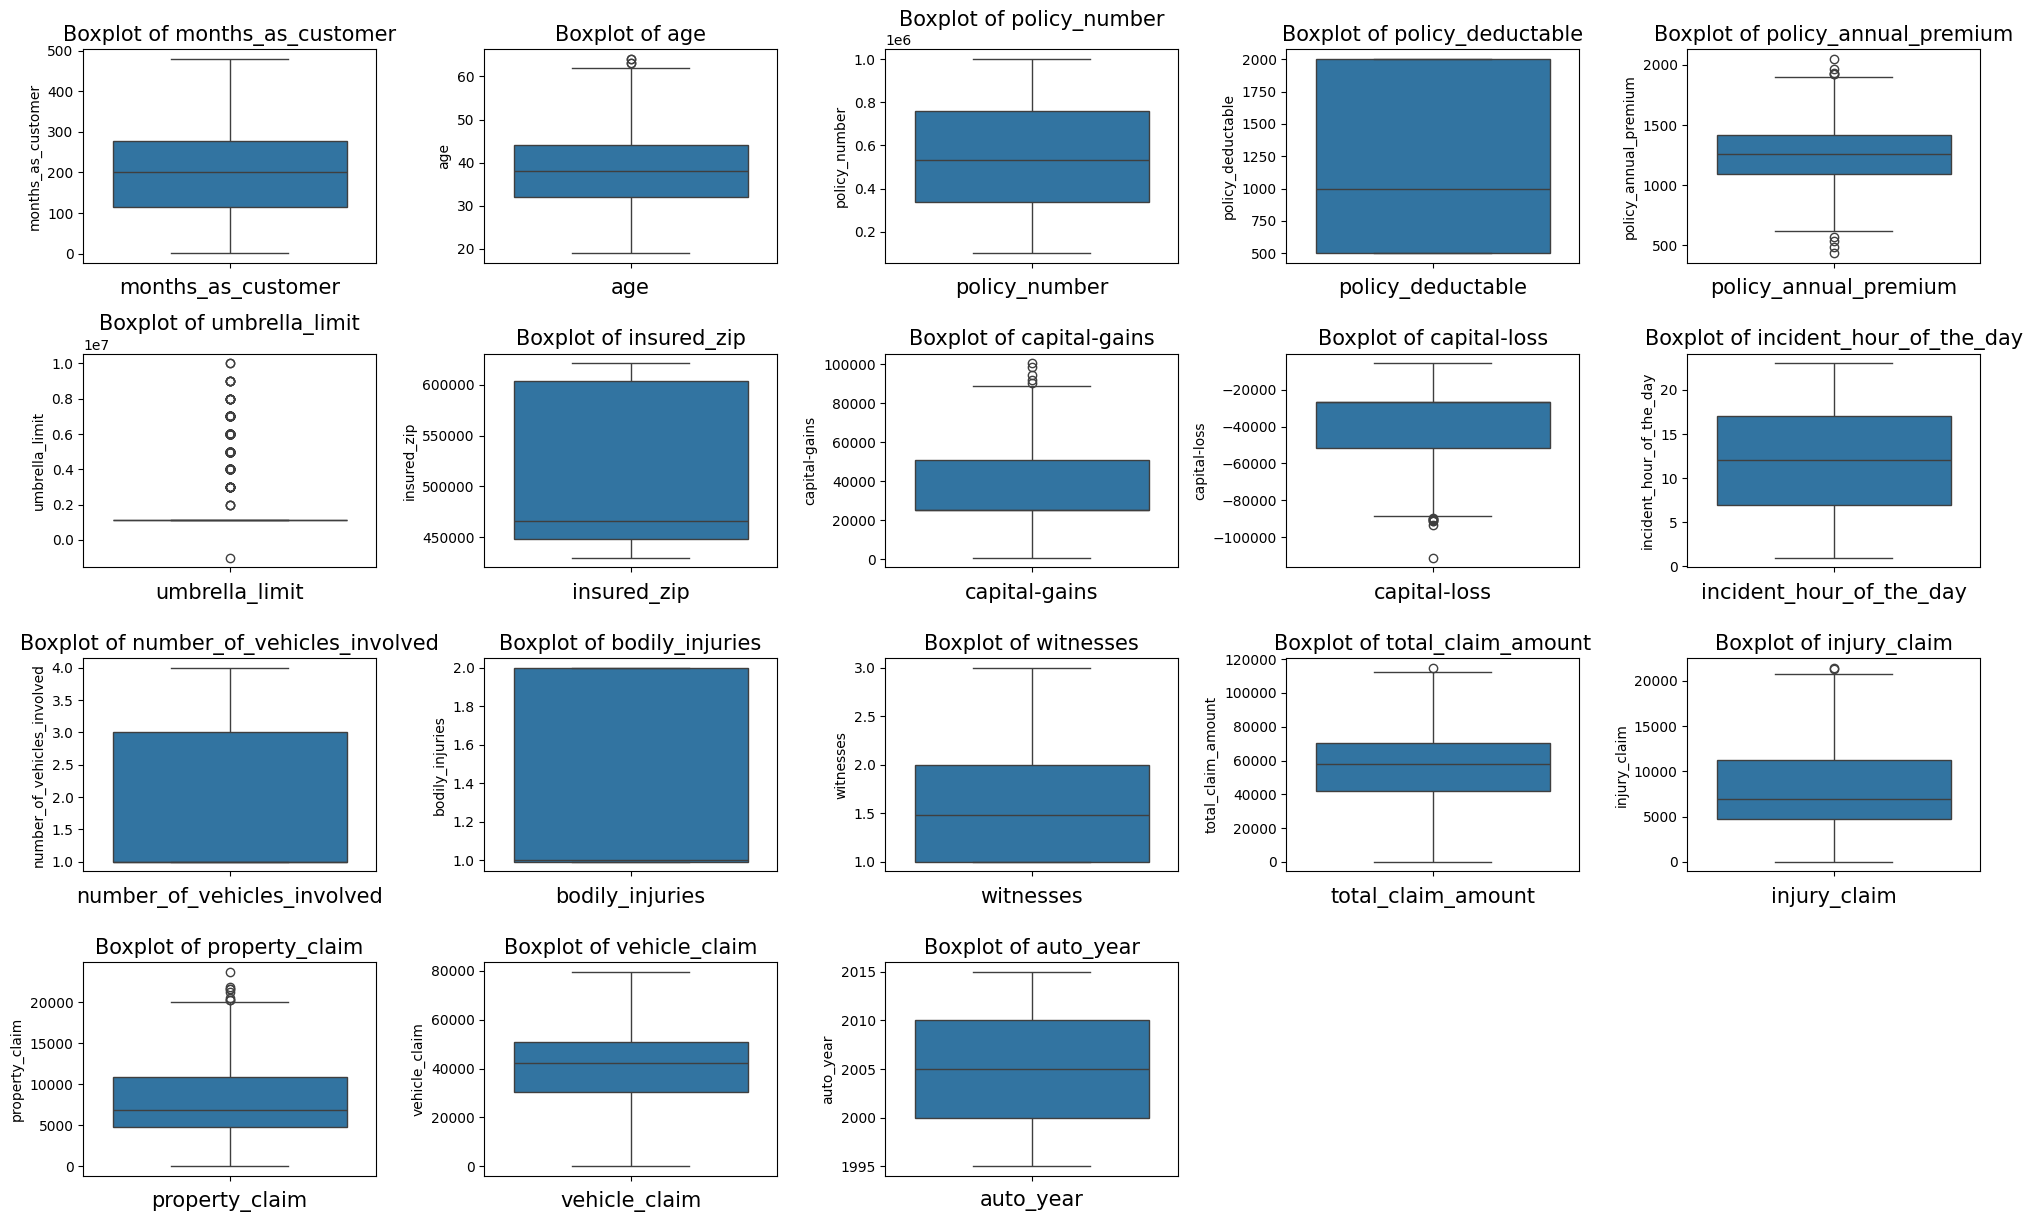

In [26]:
import seaborn as sns

def visualize_and_find_outliers(df):
    plt.figure(figsize=(20, 15))
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for i, col in enumerate(numerical_cols, start=1):
        plt.subplot(5, 5, i)
        sns.boxplot(df[col])
        plt.title(f'Boxplot of {col}', fontsize=15)
        plt.xlabel(col, fontsize=15)
        outliers = df[col][((df[col] - df[col].mean()) / df[col].std()).abs() > 3]
        print(f'Outliers in {col}: {outliers.tolist() if not outliers.empty else "No outliers found."}')

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_and_find_outliers(df)


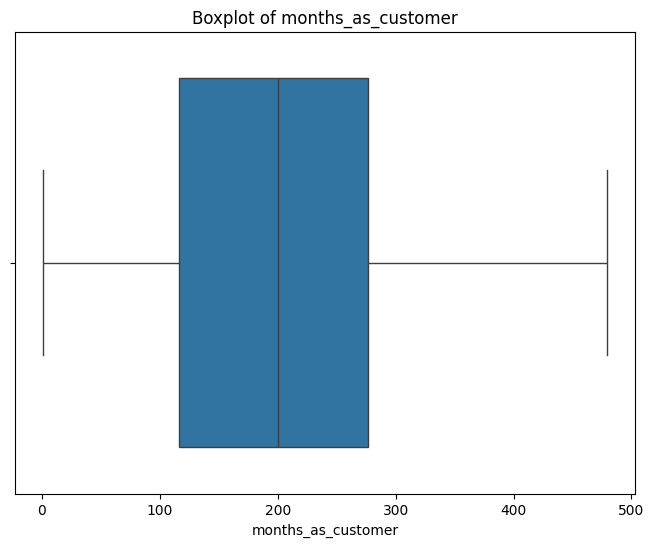

Outliers in months_as_customer:
No outliers found.


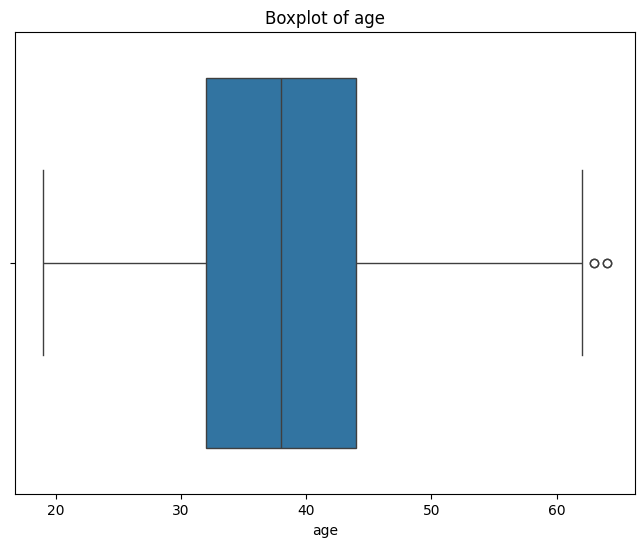

Outliers in age:
67     64
538    63
588    64
947    63
Name: age, dtype: int64


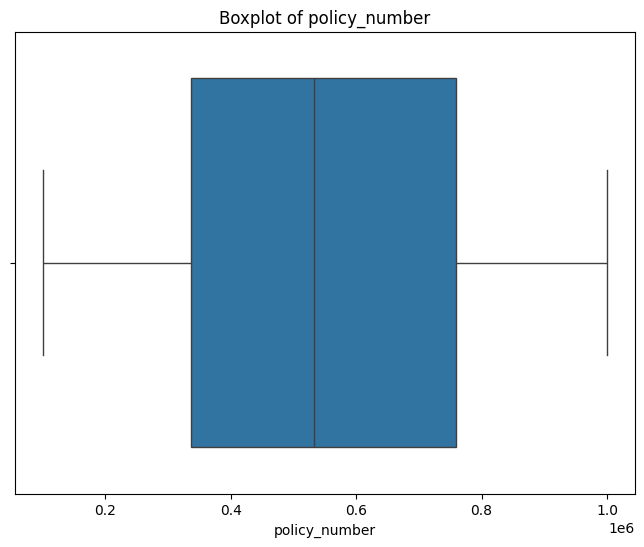

Outliers in policy_number:
No outliers found.


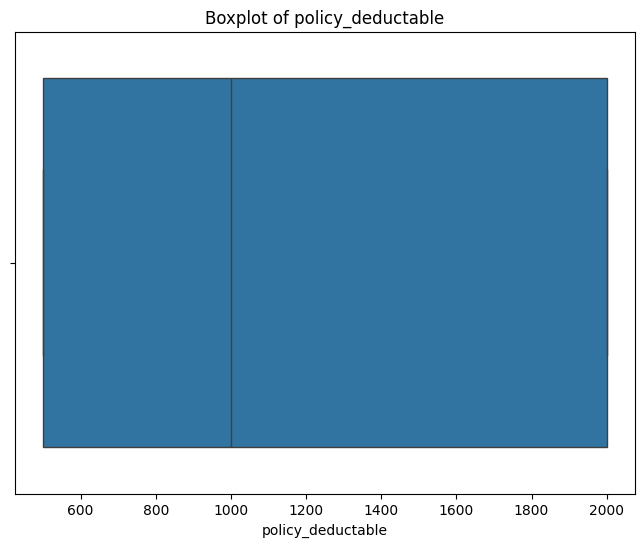

Outliers in policy_deductable:
No outliers found.


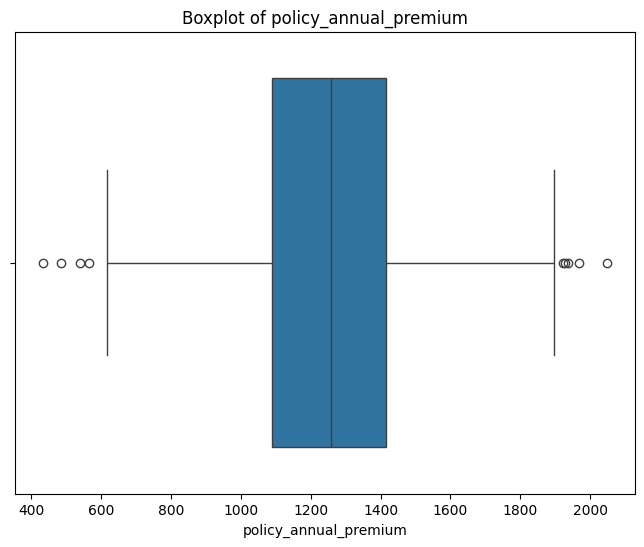

Outliers in policy_annual_premium:
43      538.17
133    1922.84
229    2047.59
248     433.33
544    1927.87
681     566.11
747    1969.63
763     484.67
796    1935.85
Name: policy_annual_premium, dtype: float64


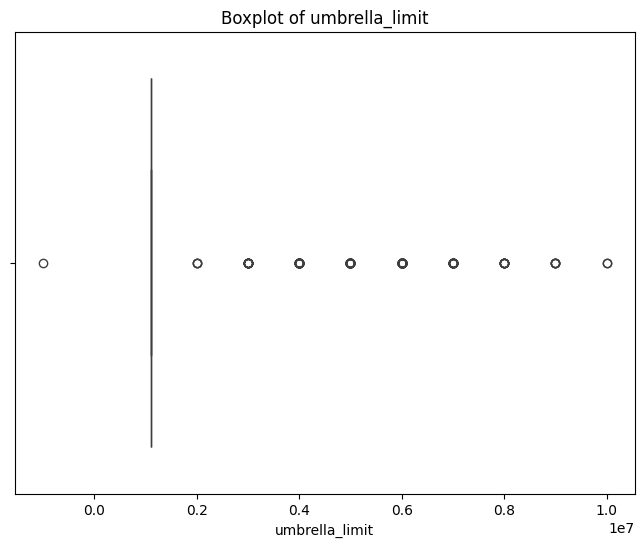

Outliers in umbrella_limit:
1      5000000
2      5000000
3      6000000
4      6000000
10     4000000
        ...   
977    4000000
987    4000000
990    3000000
997    3000000
998    5000000
Name: umbrella_limit, Length: 202, dtype: int64


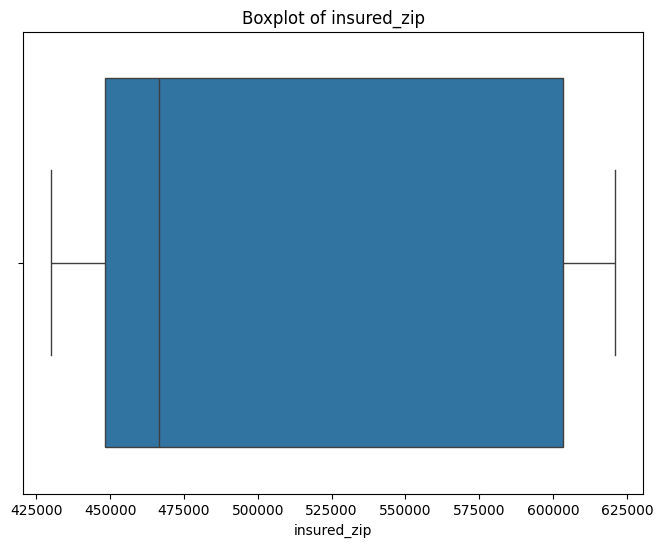

Outliers in insured_zip:
No outliers found.


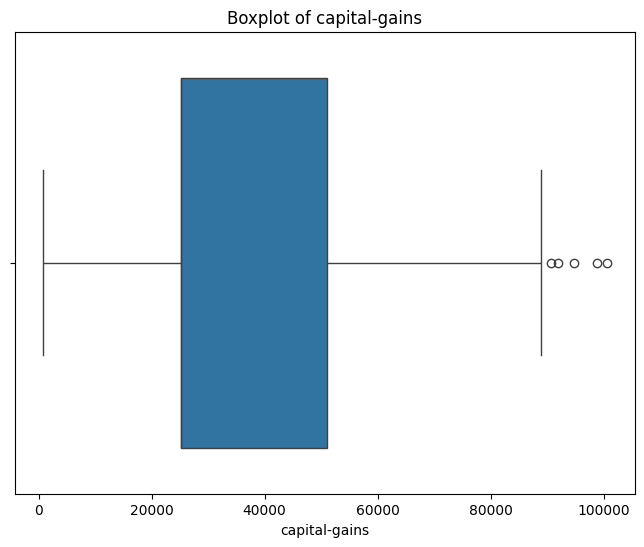

Outliers in capital-gains:
59      94800.0
93      90700.0
272     91900.0
533     98800.0
816    100500.0
Name: capital-gains, dtype: float64


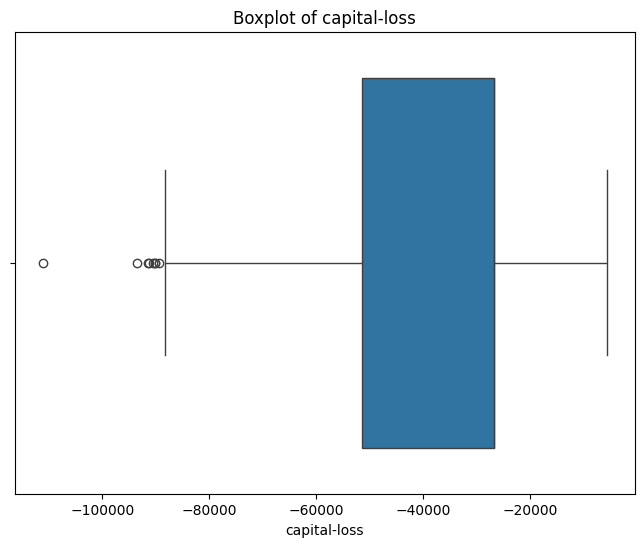

Outliers in capital-loss:
66     -91200.0
193    -90200.0
426    -91400.0
536    -90600.0
613    -90100.0
679    -93600.0
807   -111100.0
962    -89400.0
Name: capital-loss, dtype: float64


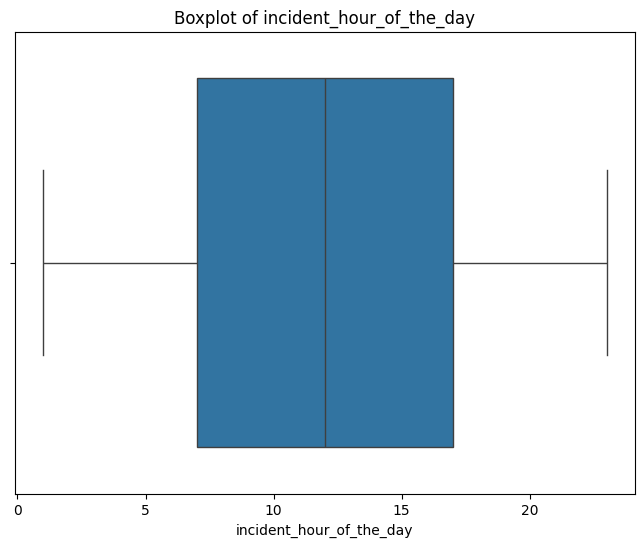

Outliers in incident_hour_of_the_day:
No outliers found.


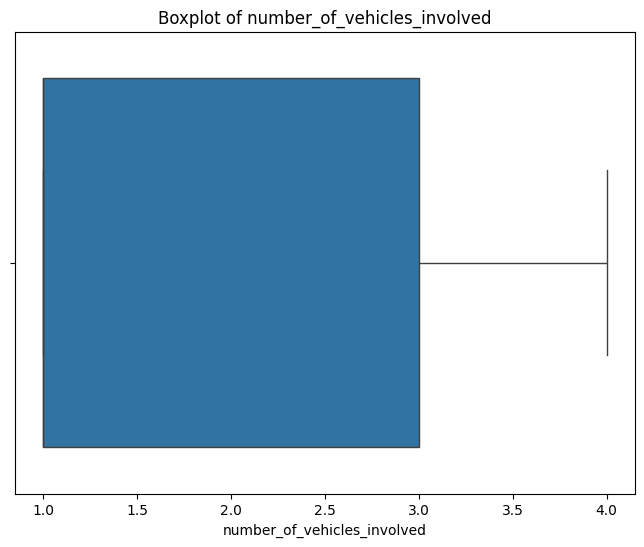

Outliers in number_of_vehicles_involved:
No outliers found.


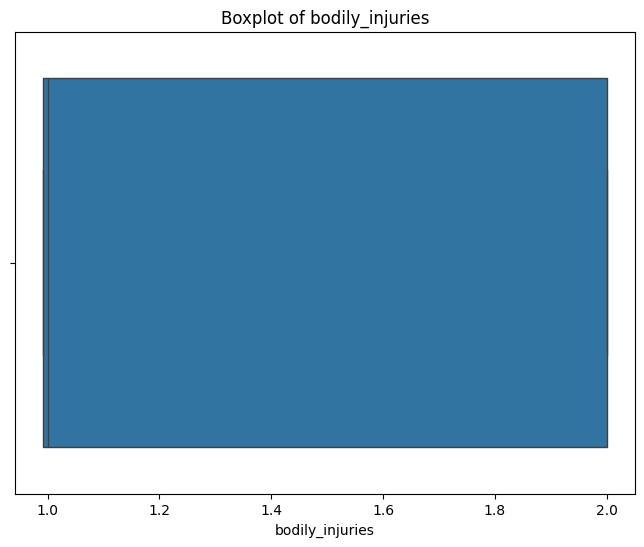

Outliers in bodily_injuries:
No outliers found.


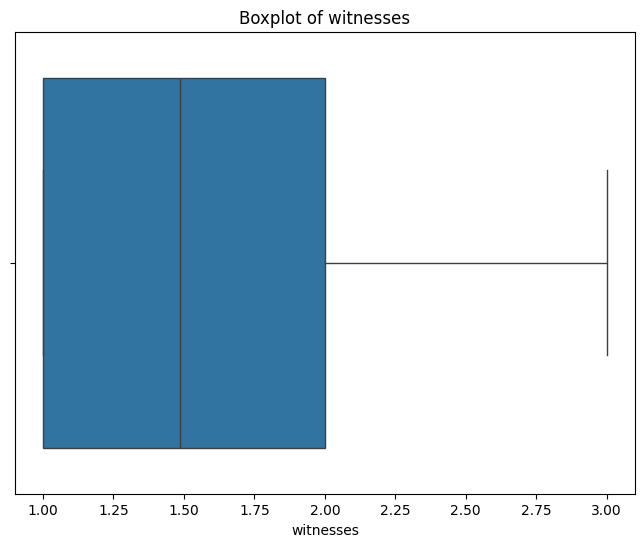

Outliers in witnesses:
No outliers found.


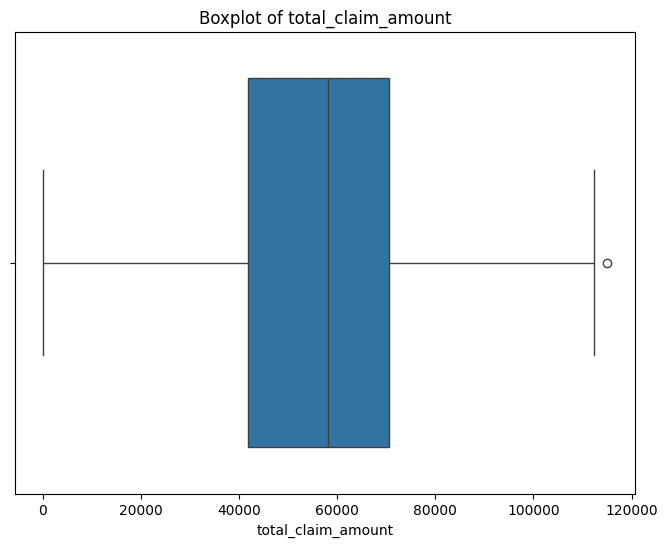

Outliers in total_claim_amount:
11    114920
Name: total_claim_amount, dtype: int64


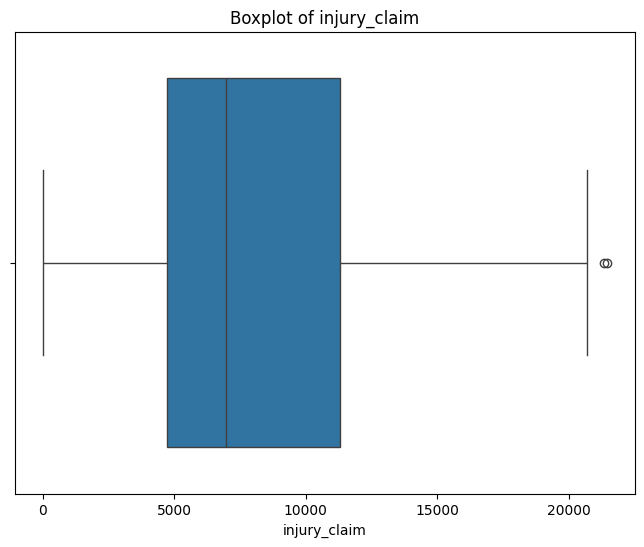

Outliers in injury_claim:
6      21450.0
836    21330.0
Name: injury_claim, dtype: float64


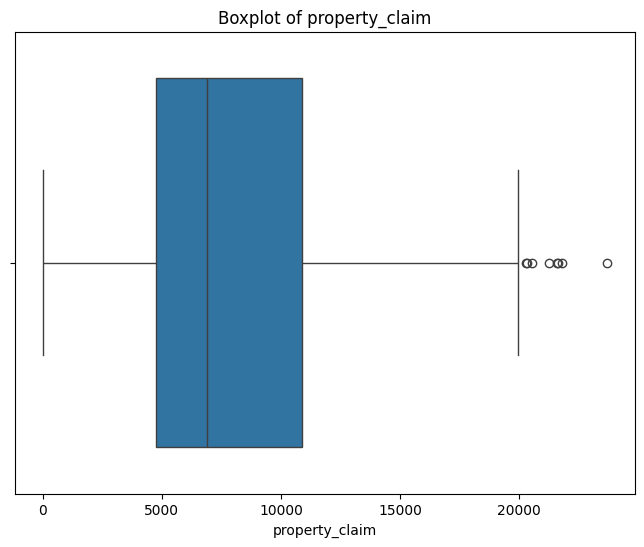

Outliers in property_claim:
163    21580.0
299    21240.0
301    21630.0
421    20280.0
500    23670.0
591    21810.0
687    20550.0
745    20310.0
Name: property_claim, dtype: float64


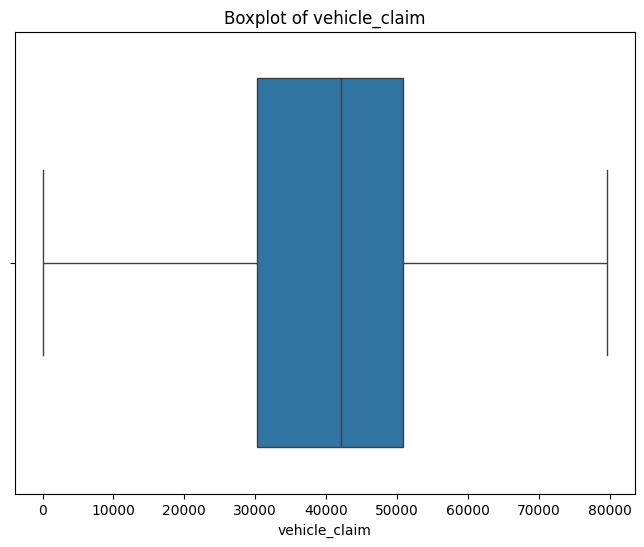

Outliers in vehicle_claim:
No outliers found.


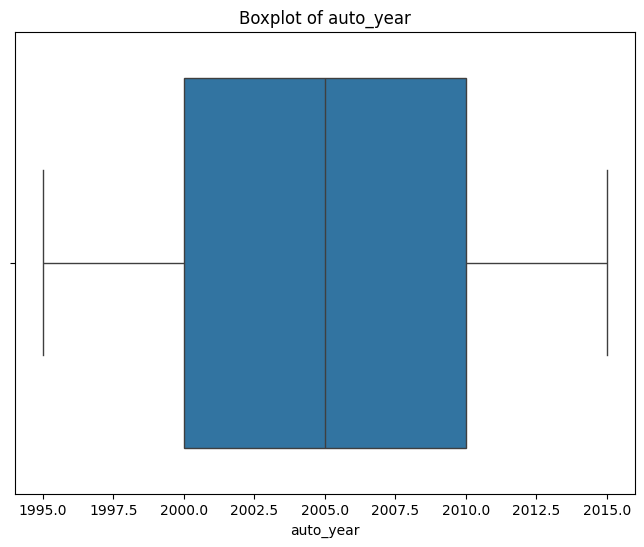

Outliers in auto_year:
No outliers found.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_and_find_outliers(df):
    for column in df:
        if df[column].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])

            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)

            plt.show()

            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

            print(f'Outliers in {column}:')
            if len(outliers) == 0:
                print('No outliers found.')
            else:
                print(outliers)

visualize_and_find_outliers(df)

# Outlier Remove By Capping

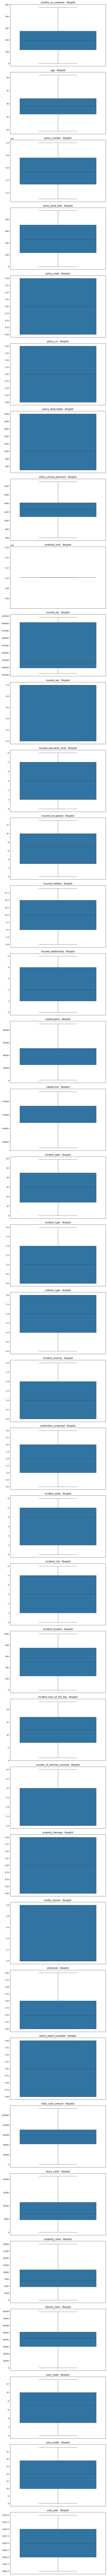

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_with_capping(df):
    capped_df = df.copy()
    for col in capped_df.columns[:-1]:
        q1 = capped_df[col].quantile(0.25)
        q3 = capped_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        capped_df[col] = capped_df[col].clip(lower=lower_bound, upper=upper_bound)
    

    num_cols = capped_df.shape[1] - 1  
    fig, axes = plt.subplots(num_cols, 1, figsize=(8, 5*num_cols))
    
    for i, col_name in enumerate(capped_df.columns[:-1]):  
        sns.boxplot(data=capped_df, y=col_name, ax=axes[i])
        axes[i].set_title(f'{col_name} - Boxplot')
        axes[i].set_ylabel('')
    
    plt.tight_layout()

    plt.show()  # Moved the plt.show() inside the function

# Call the function
visualize_with_capping(df)


#     Analyzing relationship between variable

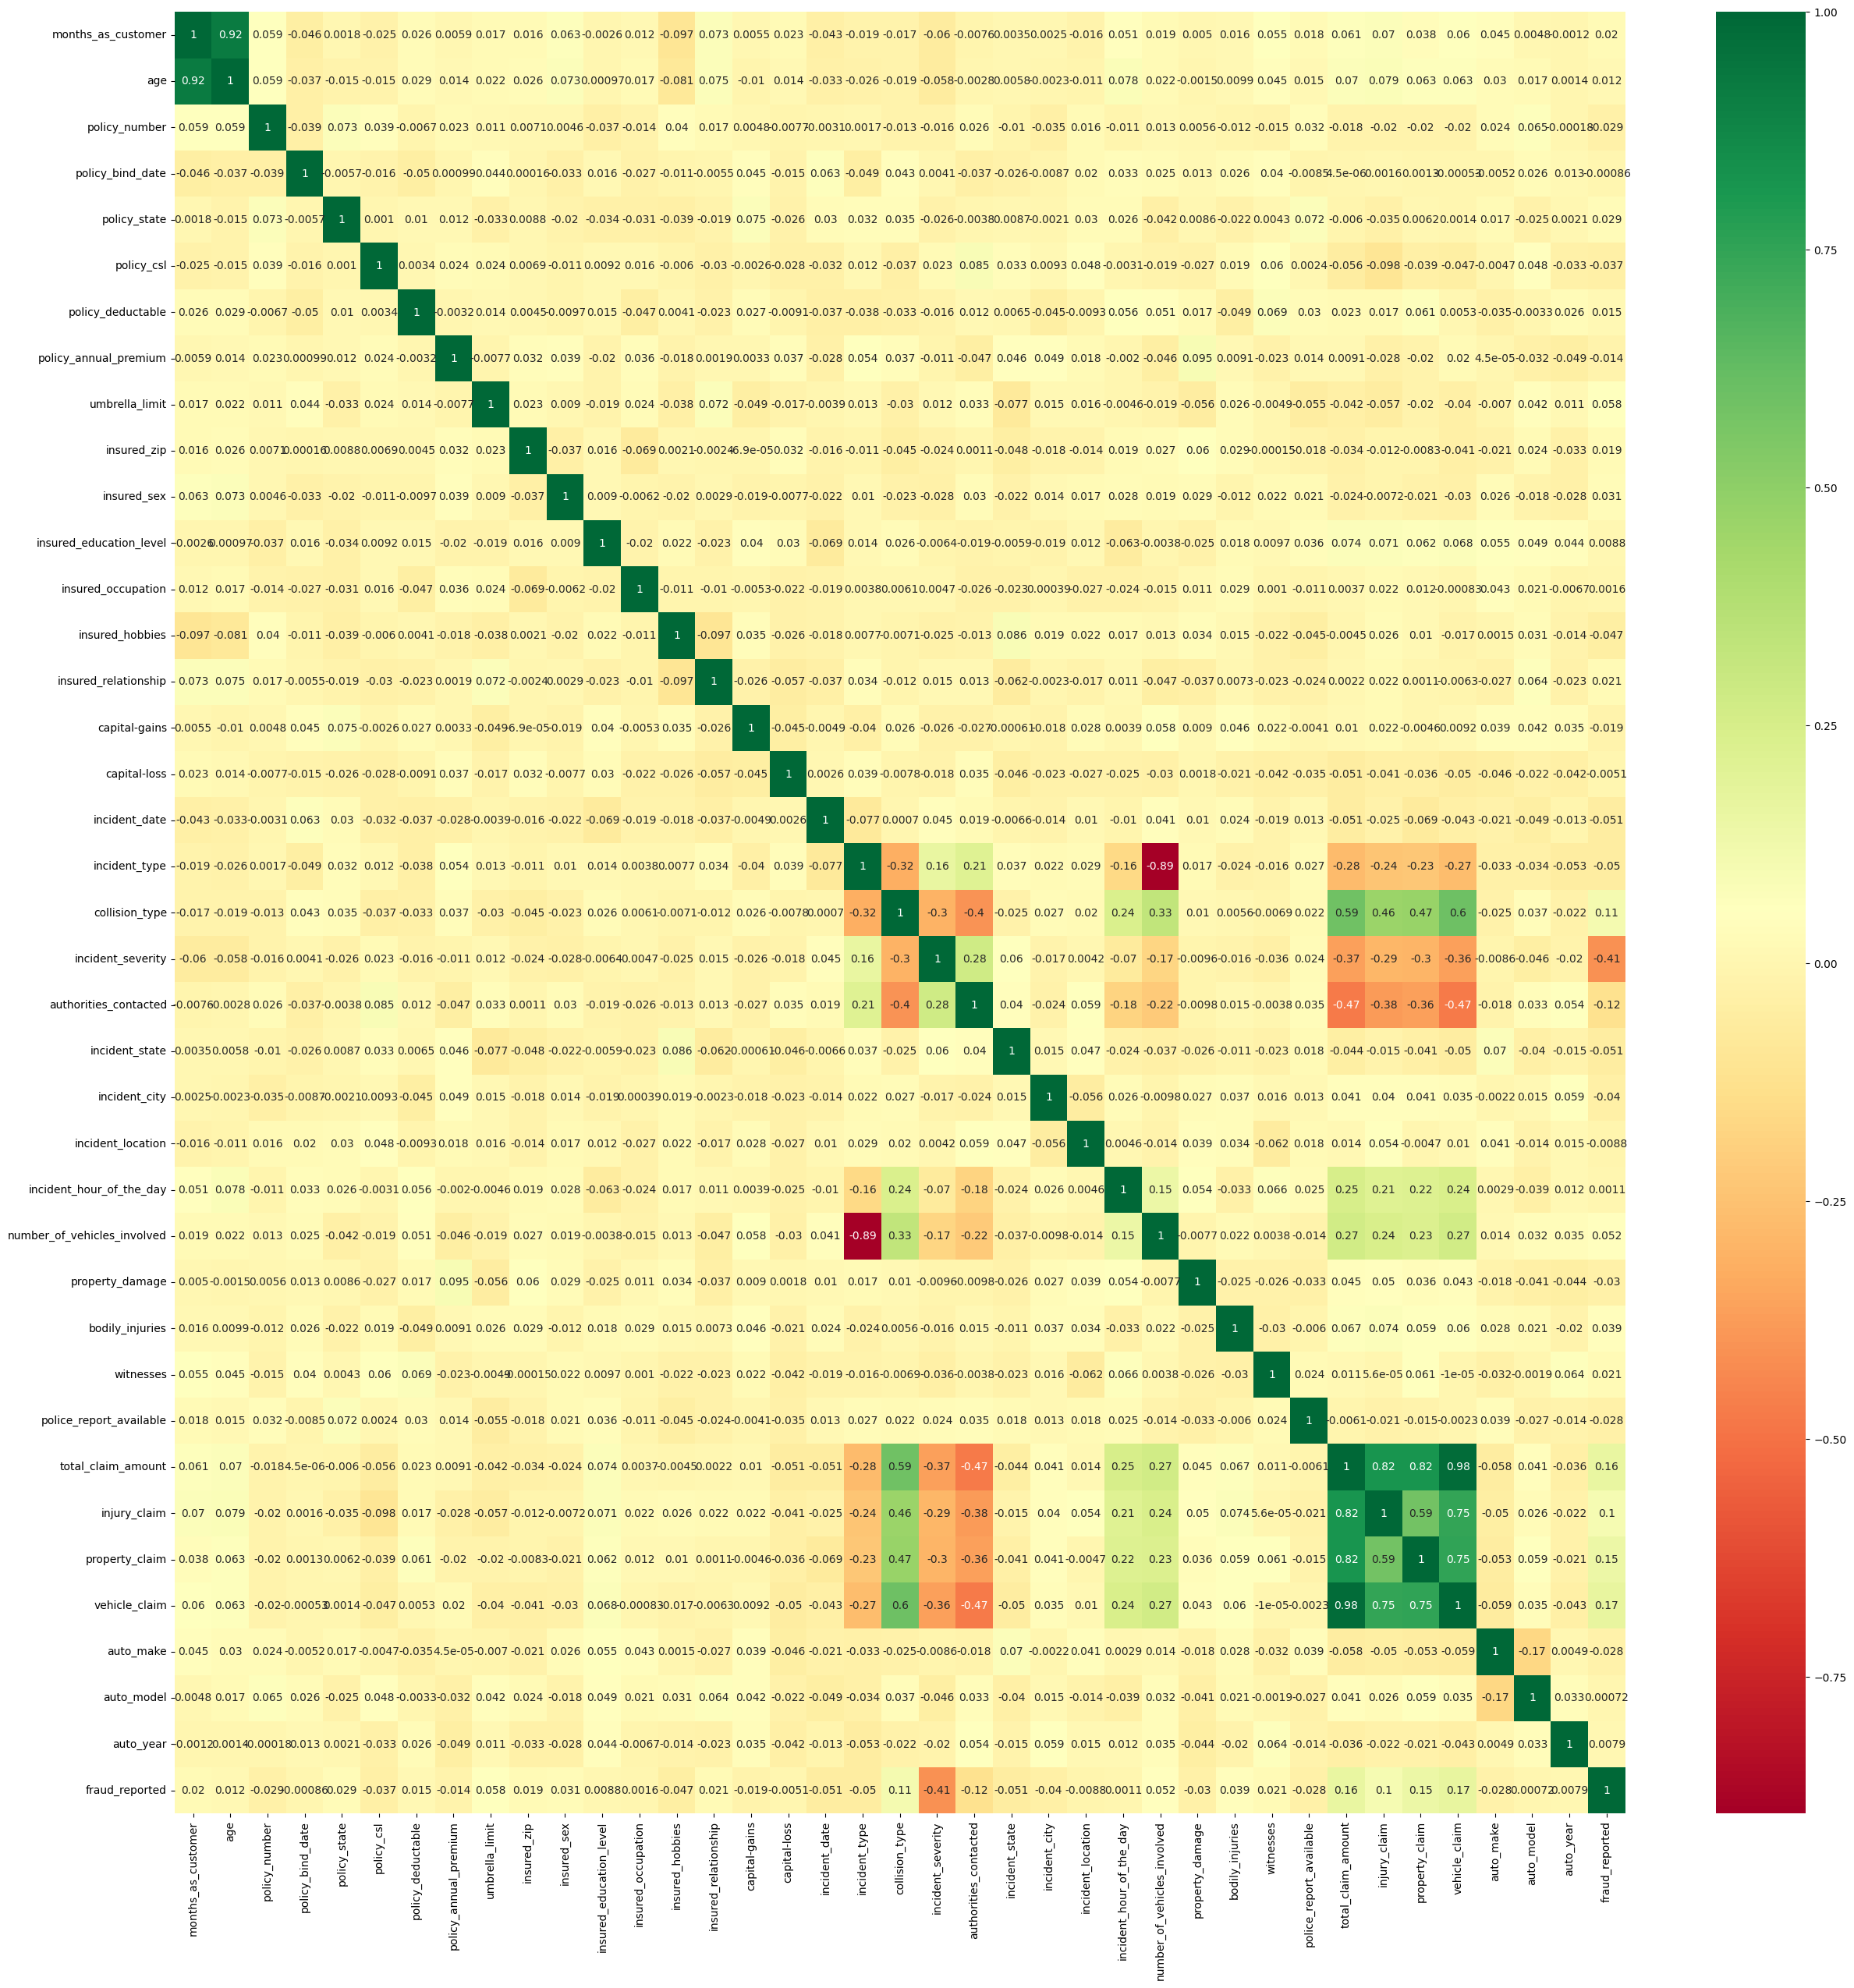

In [29]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(30,30))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [30]:
df.drop('total_claim_amount',axis = 1,inplace = True)
df.drop('vehicle_claim',axis = 1,inplace = True)

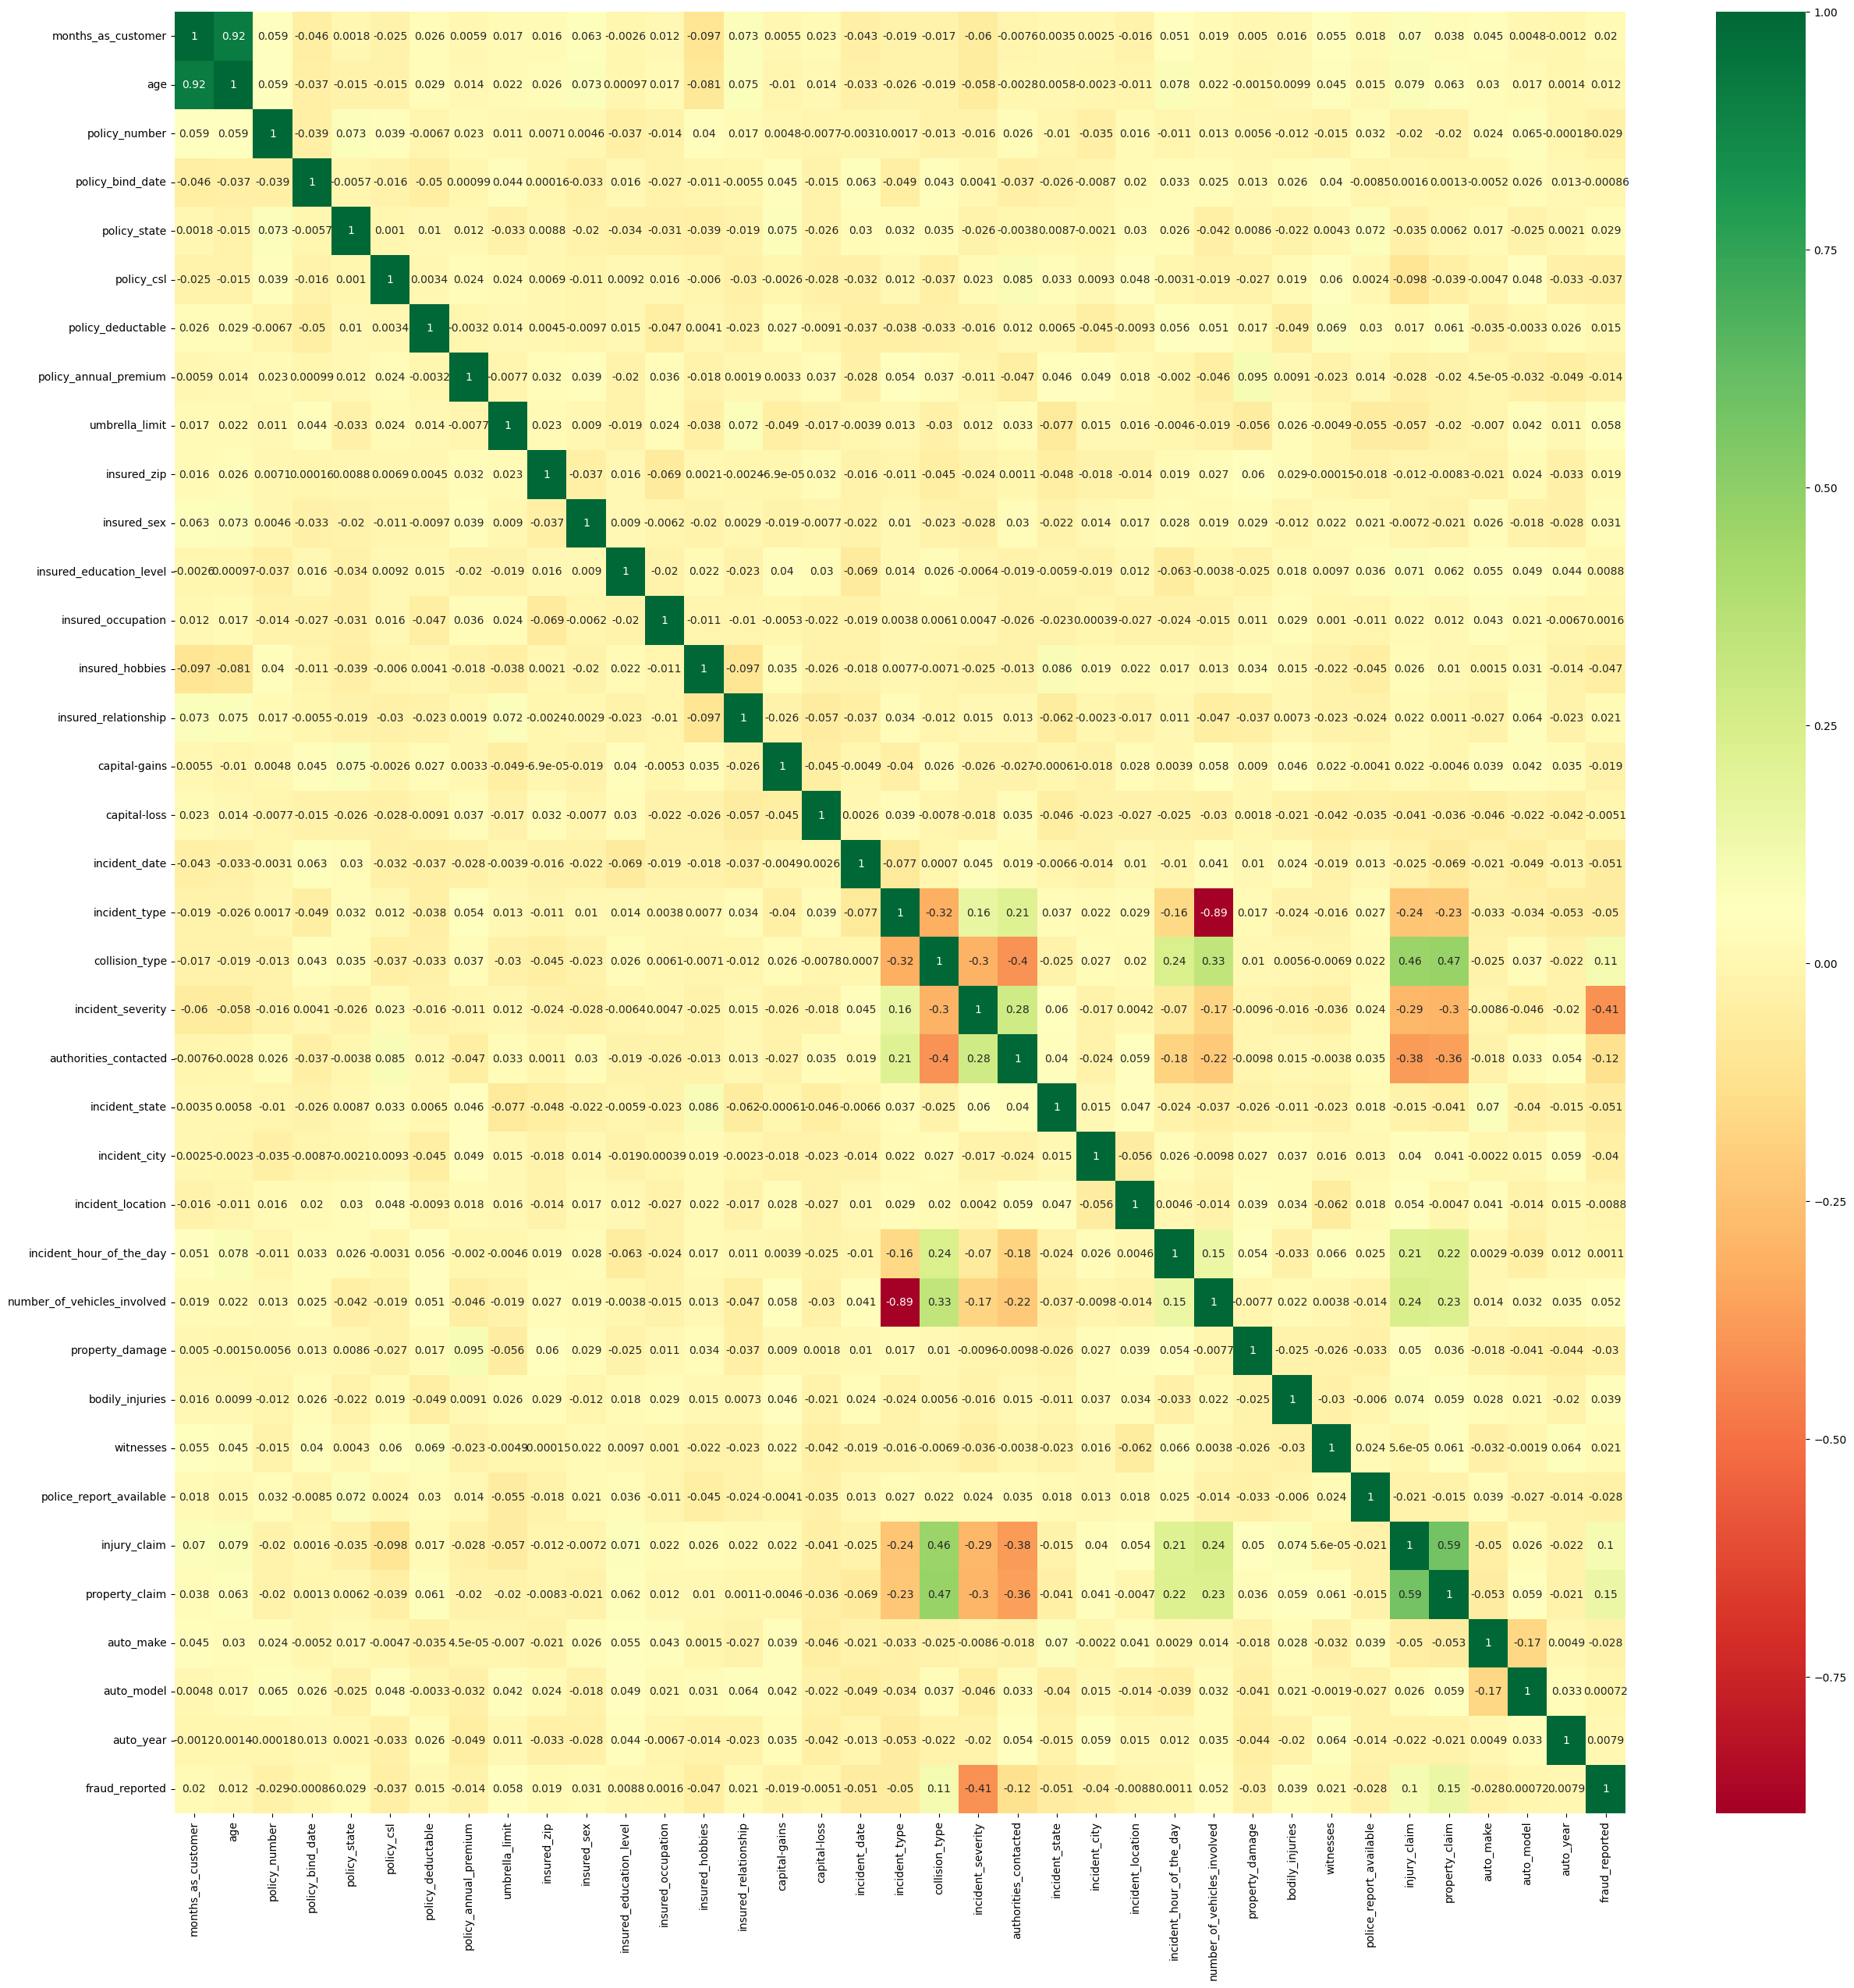

In [31]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(30,30))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# Split the dataframe into x and y

In [32]:
target = 'fraud_reported'
Y = df[target]
X = df.drop(target,axis=1)

In [33]:
Y.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [34]:
X.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year
0,328.0,48,521585,940,2,1,1000,1406.91,1101000,466132,...,1,2,1.000,2.000,2,6510.0,13020.0,10,1,2004
1,228.0,42,342868,635,1,1,2000,1197.22,5000000,468176,...,1,0,0.992,1.487,0,780.0,780.0,8,12,2007
2,134.0,29,687698,413,2,0,2000,1413.14,5000000,430632,...,3,1,2.000,3.000,1,7700.0,3850.0,4,30,2007
3,256.0,41,227811,19,0,1,2000,1415.74,6000000,608117,...,1,0,1.000,2.000,1,6340.0,6340.0,3,34,2014
4,228.0,44,367455,922,0,2,1000,1583.91,6000000,610706,...,1,1,0.992,1.000,1,1300.0,650.0,0,31,2009


In [35]:
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

# Standarization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Balance the dataset

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(SSX, Y)

In [38]:
Y.value_counts()

fraud_reported
1    753
0    753
Name: count, dtype: int64

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state = 7)

In [40]:
Y_train.value_counts()

fraud_reported
0    606
1    598
Name: count, dtype: int64

In [41]:
Y_test.value_counts()

fraud_reported
1    155
0    147
Name: count, dtype: int64

In [42]:
X_train.shape ,Y_train.shape

((1204, 36), (1204,))

In [43]:
X_test.shape , Y_test.shape

((302, 36), (302,))

# Build Model

In [44]:
#Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [45]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)

# Make Prediction

In [46]:
svc_predict = svc.predict(X_test)

In [47]:
rf_predict = rf.predict(X_test)

# Model Evalutaion

In [48]:
from sklearn.metrics import accuracy_score

print("Train Accuracy of Support Vector Machine :",svc.score(X_train,Y_train)*100)
print("Test Accuracy of Support Vector Machine :",svc.score(X_test,Y_test)*100)
print("Accuracy Score of Support Vector Machine :",accuracy_score(Y_test,svc_predict)*100)

Train Accuracy of Support Vector Machine : 96.92691029900332
Test Accuracy of Support Vector Machine : 84.10596026490066
Accuracy Score of Support Vector Machine : 84.10596026490066


In [49]:
print("Train Accuracy of RandomForestClassifier :",rf.score(X_train,Y_train)*100)
print("Test Accuracy of RandomForestClassifier :",rf.score(X_test,Y_test)*100)
print("Accuracy Score of RandomForestClassifier :",accuracy_score(Y_test,rf_predict)*100)

Train Accuracy of RandomForestClassifier : 99.5016611295681
Test Accuracy of RandomForestClassifier : 84.43708609271523
Accuracy Score of RandomForestClassifier : 84.43708609271523


<Axes: >

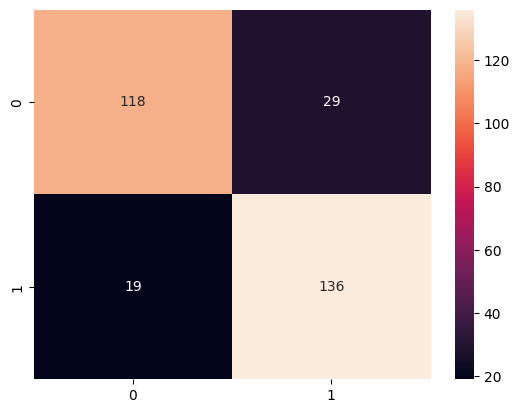

In [50]:
#Confusion Matrix and Classifiaction Report of Support Vector Machine(SVM)

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test,svc_predict)
sns.heatmap(confusion_matrix(Y_test,svc_predict),annot=True,fmt='d')

<Axes: >

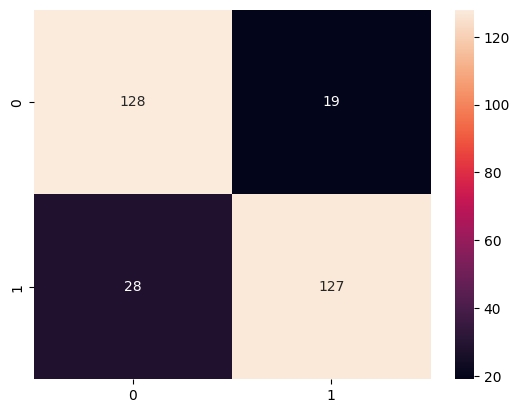

In [51]:
#Confusion Matrix and Classifiaction Report of Random Forest Classifier

cm = confusion_matrix(Y_test,rf_predict)
sns.heatmap(confusion_matrix(Y_test,rf_predict),annot=True,fmt='d')

In [52]:
print("Classification Report of Support Vector Machine :\n ",classification_report(Y_test,svc_predict))

Classification Report of Support Vector Machine :
                precision    recall  f1-score   support

           0       0.86      0.80      0.83       147
           1       0.82      0.88      0.85       155

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



In [53]:
print("Classification Report of Random Forest Classifier :\n ",classification_report(Y_test,rf_predict))

Classification Report of Random Forest Classifier :
                precision    recall  f1-score   support

           0       0.82      0.87      0.84       147
           1       0.87      0.82      0.84       155

    accuracy                           0.84       302
   macro avg       0.85      0.85      0.84       302
weighted avg       0.85      0.84      0.84       302



# Hyper Parameter Tunning For SVC

In [56]:
# Manual Hyperparameter Tuning for SVC
best_svc = None
best_accuracy = 0
for C in [0.1, 1, 10]:
    for gamma in ['scale', 'auto']:
        svc_model = SVC(C=C, gamma=gamma)
        svc_model.fit(X_train, Y_train)
        svc_predictions = svc_model.predict(X_test)
        accuracy = accuracy_score(Y_test, svc_predictions)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_svc = svc_model

print("Best SVC Model:")
print(best_svc)
print("Best Accuracy:", best_accuracy)
print(classification_report(Y_test,svc_predict))

Best SVC Model:
SVC(C=10, gamma='auto')
Best Accuracy: 0.8675496688741722
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       147
           1       0.82      0.88      0.85       155

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



# Hyper Parameter Tunning For Random Forest

In [54]:
#MAnual Hyperparameter Tuning

model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,Y_train)
predictions=model.predict(X_test)
print(confusion_matrix(Y_test,rf_predict))
print(accuracy_score(Y_test,rf_predict))
print(classification_report(Y_test,rf_predict))

[[128  19]
 [ 28 127]]
0.8443708609271523
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       147
           1       0.87      0.82      0.84       155

    accuracy                           0.84       302
   macro avg       0.85      0.85      0.84       302
weighted avg       0.85      0.84      0.84       302

